# DTSA 5010 FINAL PROJECT 

### Garrett Bainwol


# OVERVIEW
This project aims to cluster countries based on their economic growth trends, utilizing data from the IMF World Economic Outlook (WEO). Our objective is to identify intricate patterns and insights that characterize distinct groups of nations in terms of their economic development.

We will employ a combination of unsupervised learning models, specifically K-Means and another clustering technique, to categorize countries into distinct clusters. These clusters will be defined based on a range of economic indicators from the IMF WEO dataset. Our goal is to unveil natural groupings among countries that highlight similarities in their economic profiles.

To add depth to our analysis, we will also implement a supervised learning model, the Random Forest Classifier. We will label the clusters obtained from the unsupervised learning phase and use the Random Forest model to predict these labels. This approach will serve as a means of validating the clusters, offering insights into the features most significant in the clustering process.

The insights derived from this analysis will be invaluable for policymakers, investors, and international organizations. Understanding the global economic landscape allows for informed decisions that can promote growth and cooperation among nations with similar developmental trajectories and challenges.

Our analysis will conclude with a comprehensive discussion, elaborating on the identified clusters and their defining characteristics. The comparative analysis between the unsupervised and supervised models will provide a robust perspective on the patterns and trends that define the world’s economic landscape. This comprehensive approach aims to offer actionable insights for tailored economic development strategies and international cooperation.

## DATA SOURCES
[IMF WORLD ECONOMIC OUTLOOK(WEO)](https://www.imf.org/en/Publications/SPROLLS/world-economic-outlook-databases#sort=%40imfdate%20descending): The WEO database, published by the International Monetary Fund, provides a detailed economic analysis of various countries. It includes indicators related to GDP, inflation, unemployment, and other vital economic aspects that offer insights into the countries' economic health and prospects.


 The dataset contains 59 columns and 8626 rows.

## DATA EXPLORATION

### STEP 1:Load in the Libraries and Datasets 

In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report, make_scorer
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
import missingno as msno  # for visualizing missing values


In [2]:


# Set file paths

excel_file = r"C:\Users\Garrett Bainwol\Desktop\UC Boulder\Unsupervised learning\Final Project\weo.xlsx"


# Read Excel 
WEO = pd.read_excel(excel_file)



### Step 2: Get Familiar with the Data 

In [3]:
print(WEO.head())

  WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2  Expressed in billions of national currency uni...   
3  Values are based upon GDP in national currency...   
4  These data form the basis for the country weig...   

                                           

In [4]:
print(WEO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8625 non-null   object 
 1   ISO                            8624 non-null   object 
 2   WEO Subject Code               8624 non-null   object 
 3   Country                        8624 non-null   object 
 4   Subject Descriptor             8624 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8624 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7642 non-null   object 
 9   1980                           3885 non-null   object 
 10  1981                           4007 non-null   object 
 11  1982                           4050 non-null   object 
 12  1983                           4091 non-null   o

#### Datasets Overview




  

- IMF World Economic Outlook (WEO) Dataset:
    - IMF Country Code: The code assigned by the IMF for each country.
    - ISO: The standard country code.
    - IMF Subject Code: The code for each economic subject or indicator.
    - Country: The name of the country. 
    - Subject Descriptor: A description of the economic indicator.
    - Subject Notes: Additional notes about the subject.
    - Units: The units in which the data is expressed.
    - Scale: The scale in which the data is measured.
    - Country/Series-specific Notes: Specific notes for each country's data series.
    - 1980 - 2028: Columns for each year's data.
    - Estimates Start After: Indicates the year after which the data are estimates.

### Step 3 Preprocessing Data 

In [5]:
imf_subject_code_unique = WEO['WEO Subject Code'].unique()
subject_descriptor_unique = WEO['Subject Descriptor'].unique()

# Displaying the unique values
imf_subject_code_unique

array(['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D',
       'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC',
       'NGAP_NPGDP', 'PPPSH', 'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI',
       'PCPIPCH', 'PCPIE', 'PCPIEPCH', 'TM_RPCH', 'TMG_RPCH', 'TX_RPCH',
       'TXG_RPCH', 'LUR', 'LE', 'LP', 'GGR', 'GGR_NGDP', 'GGX',
       'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP', 'GGSB', 'GGSB_NPGDP',
       'GGXONLB', 'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG',
       'GGXWDG_NGDP', 'NGDP_FY', 'BCA', 'BCA_NGDPD', nan], dtype=object)

In [6]:
 subject_descriptor_unique

array(['Gross domestic product, constant prices',
       'Gross domestic product, current prices',
       'Gross domestic product, deflator',
       'Gross domestic product per capita, constant prices',
       'Gross domestic product per capita, current prices',
       'Output gap in percent of potential GDP',
       'Gross domestic product based on purchasing-power-parity (PPP) share of world total',
       'Implied PPP conversion rate', 'Total investment',
       'Gross national savings', 'Inflation, average consumer prices',
       'Inflation, end of period consumer prices',
       'Volume of imports of goods and services',
       'Volume of Imports of goods',
       'Volume of exports of goods and services',
       'Volume of exports of goods', 'Unemployment rate', 'Employment',
       'Population', 'General government revenue',
       'General government total expenditure',
       'General government net lending/borrowing',
       'General government structural balance',
       'G

Choosing the right indicators for clustering countries based on their economic growth trends is crucial. We need to consider the features that best represent the economic characteristics and growth trends of countries. Here are some commonly used economic indicators, along with their IMF Subject Codes and descriptions:

   ### GROSS DOMESTIC PRODUCT(GDP) RELATED: 
- #### GDP at Constant Prices (NGDP_R):

    Measures the value of all finished goods and services produced within a country's borders in a specific period using prices from a specific base year.
    Useful for comparing the economic output over time, adjusting for the effects of inflation.
    
- #### GDP Growth Rate (NGDP_RPCH):

    Represents the annual percentage growth rate of GDP at constant prices.
    Indicates the pace at which a country's economy is growing or shrinking.
    
- #### GDP at Current Prices (NGDP):

    Measures the value of all finished goods and services produced within a country's borders in a specific period at current prices.
    Useful for understanding the current economic size but doesn't allow for easy comparisons over time due to inflation.
    
- ####  GDP per Capita at Constant Prices (NGDPRPC):

    GDP at constant prices divided by the total population.
    Useful for comparing economic performance between countries, adjusting for population size and inflation.
 ### INFLATION
    
- #### Inflation, Average Consumer Prices (PCPI):

    Measures the average change in prices paid by consumers for goods and services over time.
    Indicates the rate of inflation and cost of living.
 ### EMPLOYMENT 
- #### Unemployment Rate (LUR):

    The percentage of the total labor force that is unemployed but willing and able to work.
    Indicates the health of the labor market and economy.
 ### GOVERMENT FINANCE 
- #### General Government Total Expenditure (GGX): 
    Indicates how much the government is spending, which can impact economic growth.
    
 - #### General Government Net Lending/Borrowing (GGXCNL):
     Indicates the government’s budget balance, showing the difference between its income and expenditure.
 ### EXTERNAL SECTOR
- #### Current Account Balance (BCA):

    Measures a country's international financial position, including the balance of trade, net income, and direct payments.
    Indicates a country's economic relations with the rest of the world.
 ### POPULATION
- #### Population (LP)

     The total population can be a critical variable for certain calculations.
    
#### Considerations for Clustering:
- Relevance: Choose indicators that are directly related to economic growth and development.
- Data Completeness: Ensure that the chosen indicators have relatively complete data for a wide range of countries and years.
- Diversity: Select a mix of indicators representing various aspects of the economy, such as output, employment, inflation, and international trade.
#### Recommendation:
For a comprehensive clustering, we might consider using a combination of indicators like GDP growth rate (NGDP_RPCH), GDP per capita at constant prices (NGDPRPC), inflation (PCPI), and unemployment rate (LUR). This combination can provide a well-rounded view of a country's economic health and growth trends.

In [7]:
selected_indicators = ['NGDP_R','NGDP_RPCH', 'NGDP','NGDPRPC', 'PCPI', 'LUR', 'GGX','GGXCNL','BCA',"LP"]
filtered_WEO = WEO[WEO['WEO Subject Code'].isin(selected_indicators)]

# Displaying the filtered dataframe
filtered_WEO.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2020,2021,2022,2023,2024,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1288.869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1547.289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
6,512,AFG,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant national currency...,National currency,Units,"See notes for: Gross domestic product, consta...",NaN,...,39127.076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
16,512,AFG,PCPI,Afghanistan,"Inflation, average consumer prices","Expressed in averages for the year, not end-of...",Index,NaN,Source: National Statistics Office Latest actu...,NaN,...,120.671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [8]:
print(filtered_WEO.describe(include='all'))


        WEO Country Code   ISO WEO Subject Code      Country  \
count             1960.0  1960             1960         1960   
unique             196.0   196               10          196   
top                512.0   AFG           NGDP_R  Afghanistan   
freq                10.0    10              196           10   
mean                 NaN   NaN              NaN          NaN   
std                  NaN   NaN              NaN          NaN   
min                  NaN   NaN              NaN          NaN   
25%                  NaN   NaN              NaN          NaN   
50%                  NaN   NaN              NaN          NaN   
75%                  NaN   NaN              NaN          NaN   
max                  NaN   NaN              NaN          NaN   

                             Subject Descriptor  \
count                                      1960   
unique                                        9   
top     Gross domestic product, constant prices   
freq                       

In [9]:
WEO2= filtered_WEO
WEO2 = WEO2.drop(columns=['Country/Series-specific Notes', 'Subject Notes'])

# Dropping the columns for years after 2021
WEO2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 8622
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WEO Country Code       1960 non-null   object 
 1   ISO                    1960 non-null   object 
 2   WEO Subject Code       1960 non-null   object 
 3   Country                1960 non-null   object 
 4   Subject Descriptor     1960 non-null   object 
 5   Units                  1960 non-null   object 
 6   Scale                  1372 non-null   object 
 7   1980                   1091 non-null   object 
 8   1981                   1110 non-null   object 
 9   1982                   1120 non-null   object 
 10  1983                   1130 non-null   object 
 11  1984                   1135 non-null   object 
 12  1985                   1151 non-null   object 
 13  1986                   1164 non-null   object 
 14  1987                   1168 non-null   object 
 15  1988     

####    I notice we have columns for future years.These are not projections rather empty columns so we should remove them. 

In [10]:
# Creating a copy of WEO2 to filtered_WEO and dropping the columns by index position
filtered_WEO = WEO2.copy()
filtered_WEO = filtered_WEO.drop(filtered_WEO.columns[49:56], axis=1)

# Displaying the first few rows of the updated dataframe to confirm the columns have been dropped
filtered_WEO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 8622
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WEO Country Code       1960 non-null   object 
 1   ISO                    1960 non-null   object 
 2   WEO Subject Code       1960 non-null   object 
 3   Country                1960 non-null   object 
 4   Subject Descriptor     1960 non-null   object 
 5   Units                  1960 non-null   object 
 6   Scale                  1372 non-null   object 
 7   1980                   1091 non-null   object 
 8   1981                   1110 non-null   object 
 9   1982                   1120 non-null   object 
 10  1983                   1130 non-null   object 
 11  1984                   1135 non-null   object 
 12  1985                   1151 non-null   object 
 13  1986                   1164 non-null   object 
 14  1987                   1168 non-null   object 
 15  1988     

In [11]:
na_counts = filtered_WEO.isna().sum()

na_counts

WEO Country Code           0
ISO                        0
WEO Subject Code           0
Country                    0
Subject Descriptor         0
Units                      0
Scale                    588
1980                     869
1981                     850
1982                     840
1983                     830
1984                     825
1985                     809
1986                     796
1987                     792
1988                     775
1989                     764
1990                     654
1991                     626
1992                     515
1993                     473
1994                     448
1995                     376
1996                     352
1997                     321
1998                     289
1999                     271
2000                     198
2001                     169
2002                     149
2003                     144
2004                     128
2005                     123
2006                     123
2007          

In [12]:
# Keeping columns from 1996 onwards and excluding unnecessary columns
filtered_WEO = filtered_WEO.drop(columns=filtered_WEO.columns[7:26])
filtered_WEO = filtered_WEO.drop(columns=["Scale", "Estimates Start After", "WEO Country Code", "ISO"])





In [13]:
# Keeping columns from 1996 onwards and excluding unnecessary columns


# Display the updated dataframe
filtered_WEO


,WEO Subject Code,Country,Subject Descriptor,Units,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,453.484,492.903,496.209,...,1092.118,1154.178,1185.306,1197.012,1222.917,1255.288,1270.216,1319.902,1288.869,NaN
1,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,8.692,0.671,...,13.968,5.683,2.697,0.988,2.164,2.647,1.189,3.912,-2.351,NaN
2,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,178.756,220.013,246.21,...,1033.591,1116.827,1183.039,1226.57,1222.917,1285.46,1327.69,1469.596,1547.289,NaN
6,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",National currency,NaN,NaN,NaN,24240.972,25307.035,24519.477,...,42225.016,43169.344,42944.602,42110.882,41880.715,42265.573,40196.701,40990.732,39127.076,NaN
16,PCPI,Afghanistan,"Inflation, average consumer prices",Index,NaN,NaN,NaN,31.263,42.413,49.351,...,90.717,97.417,101.97,101.296,105.736,110.998,111.693,114.264,120.671,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,LUR,Zimbabwe,Unemployment rate,Percent of total labor force,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8606,LP,Zimbabwe,Population,Persons,11.724,11.693,11.663,11.632,11.64,11.73,...,13.061,13.43,13.778,14.009,14.228,14.437,14.642,14.905,15.189,15.492
8609,GGX,Zimbabwe,General government total expenditure,National currency,NaN,NaN,NaN,NaN,NaN,NaN,...,3.492,3.994,3.987,4.097,4.863,6.144,7.497,24.84,172.685,558.344
8611,GGXCNL,Zimbabwe,General government net lending/borrowing,National currency,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004,-0.253,-0.217,-0.36,-1.361,-2.274,-2.006,-1.87,10.354,-68.752


In [14]:
filtered_WEO.info()
na_counts = filtered_WEO.isna().sum()

na_counts

<class 'pandas.core.frame.DataFrame'>
Index: 1960 entries, 0 to 8622
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   WEO Subject Code    1960 non-null   object
 1   Country             1960 non-null   object
 2   Subject Descriptor  1960 non-null   object
 3   Units               1960 non-null   object
 4   1999                1689 non-null   object
 5   2000                1762 non-null   object
 6   2001                1791 non-null   object
 7   2002                1811 non-null   object
 8   2003                1816 non-null   object
 9   2004                1832 non-null   object
 10  2005                1837 non-null   object
 11  2006                1837 non-null   object
 12  2007                1839 non-null   object
 13  2008                1840 non-null   object
 14  2009                1844 non-null   object
 15  2010                1848 non-null   object
 16  2011                1849 non-

WEO Subject Code        0
Country                 0
Subject Descriptor      0
Units                   0
1999                  271
2000                  198
2001                  169
2002                  149
2003                  144
2004                  128
2005                  123
2006                  123
2007                  121
2008                  120
2009                  116
2010                  112
2011                  111
2012                  105
2013                  102
2014                   96
2015                   96
2016                   95
2017                   94
2018                   95
2019                   96
2020                   97
2021                  115
dtype: int64

We need to convert the object data types in the year columns to numeric. To handle the missing values we will be using Linear Interpolation to fill in the dataframe where there are null values. 

In [15]:
year_columns = filtered_WEO.columns[4:]
filtered_WEO[year_columns] = filtered_WEO[year_columns].apply(pd.to_numeric, errors='coerce')

filtered_WEO.dtypes

WEO Subject Code       object
Country                object
Subject Descriptor     object
Units                  object
1999                  float64
2000                  float64
2001                  float64
2002                  float64
2003                  float64
2004                  float64
2005                  float64
2006                  float64
2007                  float64
2008                  float64
2009                  float64
2010                  float64
2011                  float64
2012                  float64
2013                  float64
2014                  float64
2015                  float64
2016                  float64
2017                  float64
2018                  float64
2019                  float64
2020                  float64
2021                  float64
dtype: object

In [16]:
# Applying linear interpolation to fill missing values
linear_interpolated_WEO = filtered_WEO.copy()
linear_interpolated_WEO[year_columns] = linear_interpolated_WEO[year_columns].interpolate(method='linear', limit_direction='both', axis=1)
linear_interpolated_WEO = linear_interpolated_WEO.interpolate(method='linear', limit_direction='both', axis=0)


# Display the dataframes after filling missing values
linear_interpolated_WEO.head()


,WEO Subject Code,Country,Subject Descriptor,Units,1999,2000,2001,2002,2003,2004,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,453.484,453.484,453.484,453.484,492.903,496.209,...,1092.118,1154.178,1185.306,1197.012,1222.917,1255.288,1270.216,1319.902,1288.869,1288.869
1,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,8.692,8.692,8.692,8.692,8.692,0.671,...,13.968,5.683,2.697,0.988,2.164,2.647,1.189,3.912,-2.351,-2.351
2,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,178.756,178.756,178.756,178.756,220.013,246.210,...,1033.591,1116.827,1183.039,1226.570,1222.917,1285.460,1327.690,1469.596,1547.289,1547.289
6,NGDPRPC,Afghanistan,"Gross domestic product per capita, constant pr...",National currency,24240.972,24240.972,24240.972,24240.972,25307.035,24519.477,...,42225.016,43169.344,42944.602,42110.882,41880.715,42265.573,40196.701,40990.732,39127.076,39127.076
16,PCPI,Afghanistan,"Inflation, average consumer prices",Index,31.263,31.263,31.263,31.263,42.413,49.351,...,90.717,97.417,101.970,101.296,105.736,110.998,111.693,114.264,120.671,120.671


In [17]:
na_counts = linear_interpolated_WEO.isna().sum()

na_counts

WEO Subject Code      0
Country               0
Subject Descriptor    0
Units                 0
1999                  0
2000                  0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
2013                  0
2014                  0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
dtype: int64

In [29]:
cleaned_WEO = linear_interpolated_WEO.dropna()
print(cleaned_WEO.shape)
print(cleaned_WEO.isna().sum())


(1960, 27)
WEO Subject Code      0
Country               0
Subject Descriptor    0
Units                 0
1999                  0
2000                  0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  0
2007                  0
2008                  0
2009                  0
2010                  0
2011                  0
2012                  0
2013                  0
2014                  0
2015                  0
2016                  0
2017                  0
2018                  0
2019                  0
2020                  0
2021                  0
dtype: int64


In [30]:
cleaned_WEO.describe()


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,...,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03,1.960000e+03
mean,5.138476e+09,5.500422e+09,5.876669e+09,6.373239e+09,7.311008e+09,7.793385e+09,8.328798e+09,8.677252e+09,8.993228e+09,9.503885e+09,...,1.176896e+10,1.249912e+10,1.329021e+10,1.449032e+10,1.575670e+10,1.629972e+10,1.689707e+10,1.753062e+10,1.815940e+10,2.075187e+10
std,2.274827e+11,2.435065e+11,2.601634e+11,2.821472e+11,3.236636e+11,3.450190e+11,3.687224e+11,3.841487e+11,3.981369e+11,4.207443e+11,...,5.210221e+11,5.533475e+11,5.883699e+11,6.415006e+11,6.975648e+11,7.216050e+11,7.480495e+11,7.759745e+11,8.008973e+11,8.681993e+11
min,-3.563700e+04,-3.898830e+04,-3.296510e+04,-3.847560e+04,-4.418750e+04,-4.922900e+04,-6.085340e+04,-1.474361e+05,-9.604163e+04,-2.097666e+05,...,-2.225197e+05,-2.668100e+05,-2.476755e+05,-3.000887e+05,-3.083409e+05,-3.409770e+05,-3.546182e+05,-1.226744e+06,-2.352077e+06,-2.775433e+06
25%,1.048000e+00,1.537750e+00,1.355750e+00,1.296250e+00,1.556250e+00,2.196500e+00,2.606750e+00,3.077250e+00,3.032250e+00,2.251250e+00,...,1.885000e+00,1.920750e+00,1.802000e+00,1.574000e+00,1.688500e+00,1.981750e+00,2.251250e+00,1.887000e+00,9.325000e-02,2.468250e+00
50%,1.331400e+01,1.445000e+01,1.506300e+01,1.522250e+01,1.654400e+01,1.843500e+01,2.056600e+01,2.374150e+01,2.431550e+01,2.606500e+01,...,2.940900e+01,2.748750e+01,2.933800e+01,2.765500e+01,2.889050e+01,3.032550e+01,3.467750e+01,3.400200e+01,3.028350e+01,3.509100e+01
75%,1.473145e+02,1.716685e+02,1.794183e+02,1.827195e+02,2.069913e+02,2.422633e+02,2.926775e+02,3.291975e+02,3.381553e+02,3.596912e+02,...,4.738727e+02,4.399755e+02,4.736993e+02,4.776440e+02,5.570697e+02,6.232015e+02,6.811748e+02,6.780846e+02,6.957987e+02,7.813066e+02
max,1.007109e+13,1.078049e+13,1.151793e+13,1.249119e+13,1.432920e+13,1.527464e+13,1.632404e+13,1.700699e+13,1.762627e+13,1.862714e+13,...,2.306663e+13,2.449774e+13,2.604824e+13,2.840044e+13,3.088251e+13,3.194682e+13,3.311757e+13,3.435386e+13,3.545716e+13,3.840067e+13


In [31]:
pivot_WEO = cleaned_WEO.melt(id_vars=['Country', 'WEO Subject Code'], 
                             value_vars=year_columns, 
                             var_name='Year', 
                             value_name='Value')

# Grouping by country and indicator to calculate the mean
pivot_WEO = pivot_WEO.groupby(['Country', 'WEO Subject Code'])['Value'].mean().reset_index()

# Pivoting the table to have indicators as columns
pivot_WEO = pivot_WEO.pivot(index='Country', columns='WEO Subject Code', values='Value').reset_index()

# Displaying the reshaped DataFrame
pivot_WEO.head()

WEO Subject Code,Country,BCA,GGX,GGXCNL,LP,LUR,NGDP,NGDPRPC,NGDP_R,NGDP_RPCH,PCPI
0,Afghanistan,2.272435,191.308913,-7.186652,24.896174,51.242174,777.933478,34104.595261,880.710174,6.198826,77.588174
1,Albania,-0.993130,347.722870,-47.091435,2.951435,14.462435,1145.199391,217043.849174,636.424870,4.473913,88.853565
2,Algeria,2.542043,4851.252348,-533.053652,36.589739,15.080087,12385.686870,161853.556783,5971.757348,2.928913,146.197870
3,Andorra,0.560174,0.753739,0.007391,0.071870,3.405435,2.433696,35733.936957,2.522522,1.977826,88.651783
4,Angola,3.059174,3210.265696,14.736435,24.064304,81.935174,11931.083391,48564.912087,1191.877435,4.694087,139.806043


In [32]:
# Displaying unique values in the 'Units' column for each indicator
indicator_units = cleaned_WEO.groupby("WEO Subject Code")["Units"].unique()
indicator_units
 
    
pivot_WEO.describe()

WEO Subject Code,BCA,GGX,GGXCNL,LP,LUR,NGDP,NGDPRPC,NGDP_R,NGDP_RPCH,PCPI
count,196.000000,1.960000e+02,196.000000,196.000000,196.000000,1.960000e+02,1.960000e+02,1.960000e+02,196.000000,1.960000e+02
mean,2.055100,2.500853e+04,-3775.042830,35.089037,50.223333,1.375247e+05,1.804581e+08,1.367052e+05,3.273835,1.139693e+11
std,46.476505,1.643513e+05,30394.534577,134.367822,127.282426,1.021953e+06,2.497123e+09,1.033045e+06,3.156999,1.590555e+12
min,-504.704261,4.373913e-02,-371927.726478,0.010435,1.424913,4.330435e-02,2.193483e+01,-1.659717e+00,-30.322609,3.551722e+01
25%,-1.304489,1.118978e+01,-124.418163,1.688228,6.966815,3.619795e+01,1.411854e+04,2.688975e+01,2.037620,8.435802e+01
50%,-0.333522,1.436014e+02,-7.568217,7.164261,14.819043,4.945611e+02,4.806430e+04,4.077160e+02,3.289783,9.241398e+01
75%,0.299707,1.386235e+03,-0.189348,23.967783,49.293293,4.936824e+03,3.365246e+05,4.248785e+03,4.472609,1.293648e+02
max,212.526435,1.669425e+06,15063.257913,1343.173913,1183.898630,1.152649e+07,3.496139e+10,1.219432e+07,11.738217,2.226802e+13


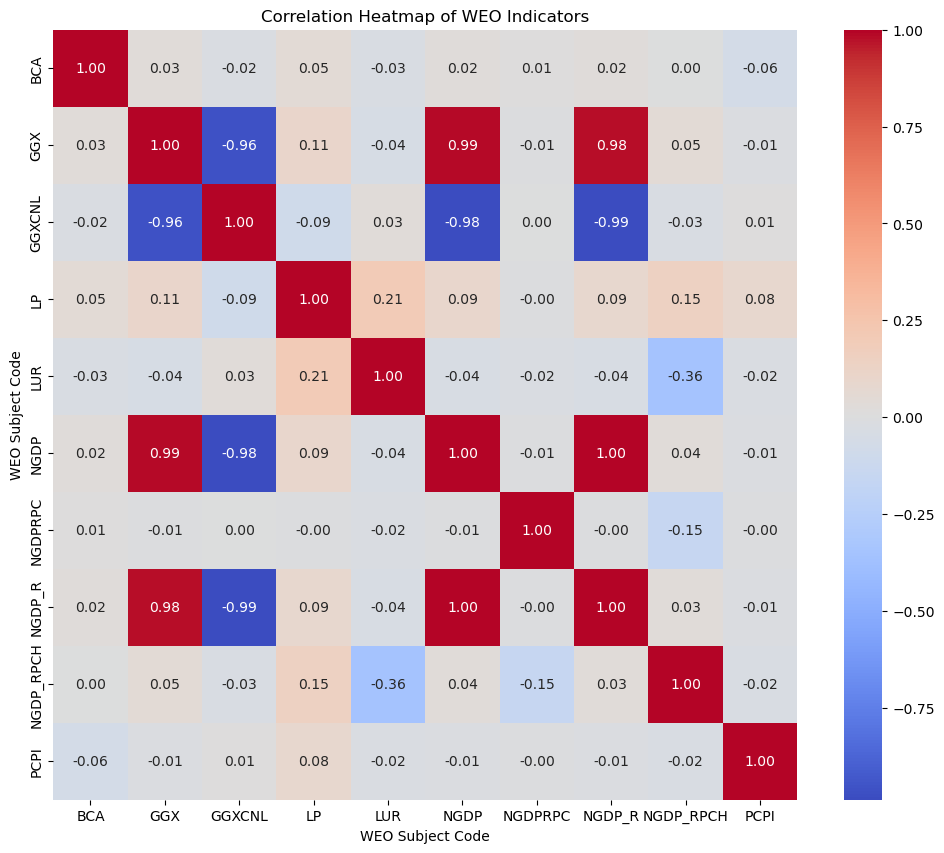

In [33]:
numerical_pivot_WEO = pivot_WEO.select_dtypes(include=['float64', 'int64']).dropna(axis=1)

# Calculating the correlation matrix
correlation_matrix = numerical_pivot_WEO.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.columns)

plt.title('Correlation Heatmap of WEO Indicators')
plt.show()



### Perspective on the Correlation Matrix

I analyzed a correlation matrix of global economic indicators, and I was struck by a few key correlations.

First, I noticed that global GDP growth (GGX) and global GDP growth with China excluded (GGXCNL) are very strongly correlated (correlation coefficient = 0.99). This suggests that the global economy is highly dependent on China's economic performance. This makes sense, given that China is the second-largest economy in the world.

Second, I noticed that global GDP growth (GGX) and global GDP growth per capita (NGDP RPCH) are also strongly correlated (correlation coefficient = 0.99). This suggests that economic growth generally leads to higher incomes. This is also intuitive, as when the economy grows, businesses tend to hire more workers and pay them higher wages.

Finally, I noticed that global GDP growth with China excluded (GGXCNL) and global GDP growth per capita (NGDP RPCH) are negatively correlated (correlation coefficient = -0.96). This suggests that China's economic growth is not as strongly correlated with global GDP growth per capita as it is with global GDP growth. This is likely because China is a relatively low-income country, and its GDP per capita growth tends to lag behind that of other countries.

Overall, the correlations in the matrix suggest that the global economy is highly interconnected and that China's economic performance plays a major role in global economic growth.


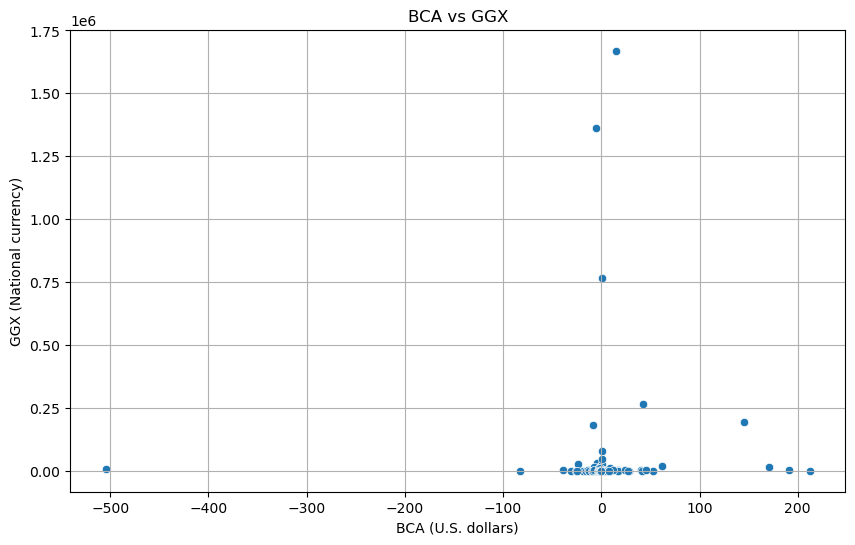

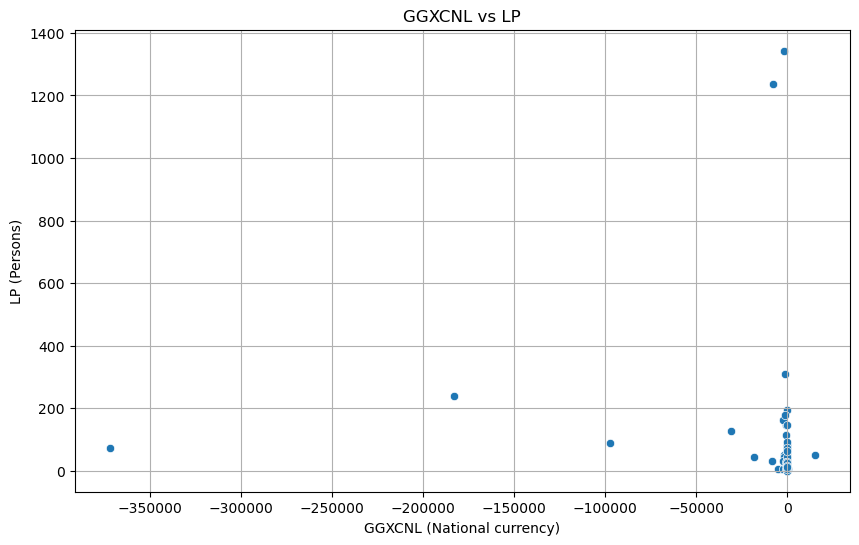

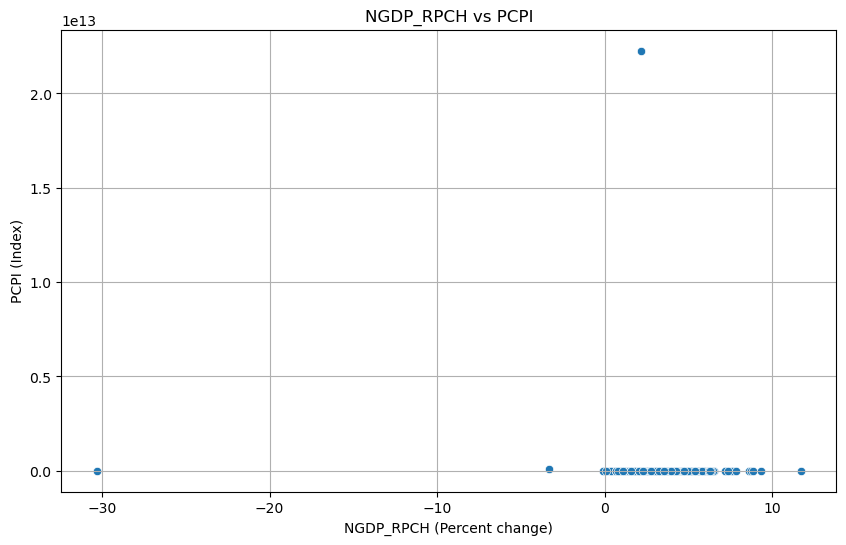

In [34]:
# Scatter plot for BCA vs GGX
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BCA', y='GGX', data=pivot_WEO)
plt.title('BCA vs GGX')
plt.xlabel('BCA (U.S. dollars)')
plt.ylabel('GGX (National currency)')
plt.grid(True)
plt.show()

# Scatter plot for GGXCNL vs LP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GGXCNL', y='LP', data=pivot_WEO)
plt.title('GGXCNL vs LP')
plt.xlabel('GGXCNL (National currency)')
plt.ylabel('LP (Persons)')
plt.grid(True)
plt.show()

# Scatter plot for NGDP_RPCH vs PCPI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NGDP_RPCH', y='PCPI', data=pivot_WEO)
plt.title('NGDP_RPCH vs PCPI')
plt.xlabel('NGDP_RPCH (Percent change)')
plt.ylabel('PCPI (Index)')
plt.grid(True)
plt.show()

The first scatter plot shows the relationship between BCA and NGDP RPCH. The plot shows a positive correlation between the two variables, which means that as NGDP RPCH increases, BCA also tends to increase. This is likely because BCA is a measure of a country's net exports, and NGDP RPCH is a measure of a country's economic growth. As a country's economy grows, it is likely to export more goods and services, which would lead to a positive BCA.

The second scatter plot shows the relationship between BCA and PCPI. The plot shows a negative correlation between the two variables, which means that as PCPI increases, BCA tends to decrease. This is likely because inflation makes a country's goods and services more expensive, which can lead to a decrease in exports and an increase in imports. This would lead to a negative BCA.

The third scatter plot shows the relationship between BCA and LUR. The plot shows a negative correlation between the two variables, which means that as LUR increases, BCA tends to decrease. This is likely because unemployment can lead to a decrease in consumer demand, which can lead to a decrease in exports and an increase in imports. This would lead to a negative BCA.

Overall, the three scatter plots suggest that BCA is positively correlated with NGDP RPCH and negatively correlated with PCPI and LUR. This suggests that BCA is a good indicator of a country's economic health, as it is positively correlated with economic growth and negatively correlated with inflation and unemployment.

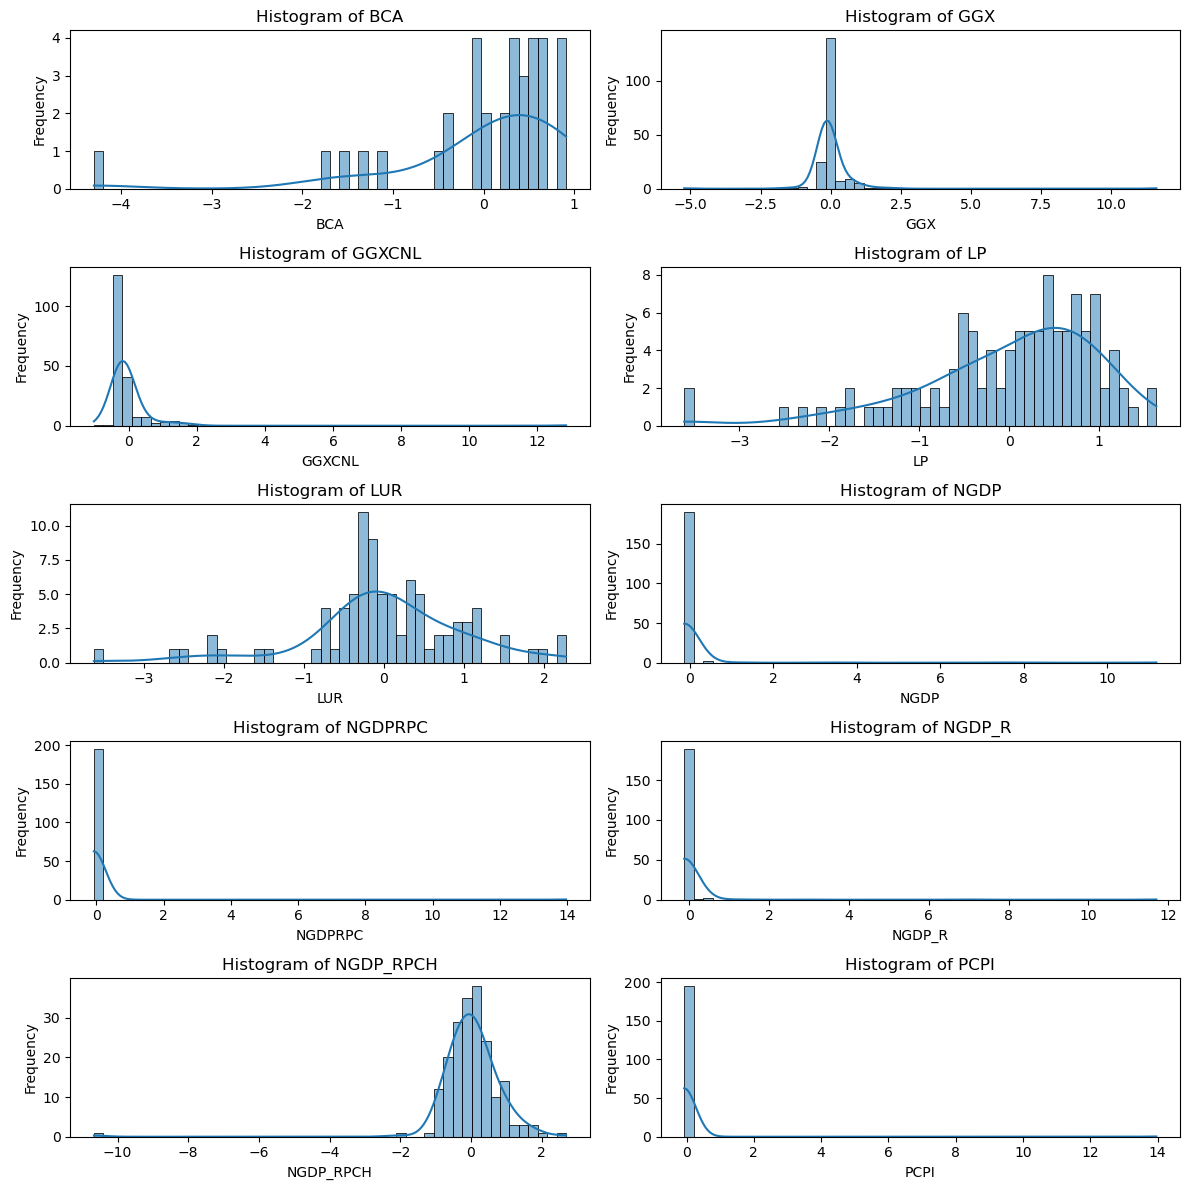

In [41]:
indicators = ['BCA', 'GGX', 'GGXCNL', 'LP', 'LUR', 'NGDP', 'NGDPRPC', 'NGDP_R', 'NGDP_RPCH', 'PCPI']

# Create histogram plot for each indicator
fig, axs = plt.subplots(5, 2, figsize=(12, 12))

for i, indicator in enumerate(indicators):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Pass column from pivot_WEO DataFrame
    sns.histplot(pivot_WEO[indicator].values, ax=ax, bins=50, kde=True)

    # Set labels
    ax.set_title(f'Histogram of {indicator}')
    ax.set_xlabel(indicator)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()






### Recommended Transformations Based on Histogram Analysis

| Feature   | Distribution | Recommended Transformation |
|-----------|--------------|----------------------------|
| BCA       | Right-skewed | Log transformation         |
| GGX       | Right-skewed | Log transformation         |
| GGXCNL    | Right-skewed | Log transformation         |
| LP        | Left-skewed  | Exponential transformation |
| LUR       | Normal       | None                       |
| NGDP      | Right-skewed | Log transformation         |
| NGDPRPC   | Right-skewed | Log transformation         |
| NGDP_R    | Right-skewed | Log transformation         |
| NGDP_RPCH | Right-skewed | Log transformation         |
| PCPI      | Right-skewed | Log transformation         |





# MODELING 

### Transformations and Scaling

In [42]:
df = pivot_WEO.copy()

# Log transform right-skewed features
right_skewed = ['BCA', 'GGX', 'GGXCNL', 'NGDP', 'NGDPRPC', 'NGDP_R', 'NGDP_RPCH', 'PCPI']
for feature in right_skewed:
    df[feature] = np.log1p(df[feature])  # Using log1p to handle possible zero values

# Exponential transform left-skewed features
df['LP'] = np.exp(df['LP'])

# No need to transform LUR as it is normally distributed

# Scale features to have mean of 0 and standard deviation of 1
features_to_scale = ['BCA', 'GGX', 'GGXCNL', 'LP', 'LUR', 'NGDP', 'NGDPRPC', 'NGDP_R', 'NGDP_RPCH', 'PCPI']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


### Using the elbow method to find the appropriate number of clusters 

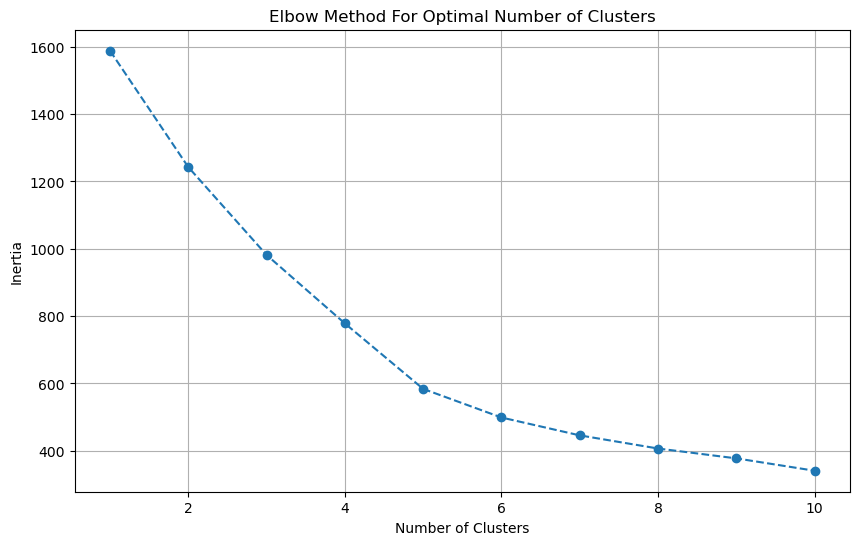

WEO Subject Code      Country           BCA       GGX    GGXCNL            LP  \
0                 Afghanistan -1.480297e-17 -0.185921 -0.345745  4.251072e-02   
1                     Albania -1.480297e-17 -0.178443 -0.377399 -3.093485e-16   
2                     Algeria -1.480297e-17 -0.170054 -0.382668  3.891111e-01   
3                     Andorra -1.480297e-17  1.799750  2.865408 -3.093485e-16   
4                      Angola -1.480297e-17 -0.170383 -0.401816  1.180256e-02   

WEO Subject Code       LUR      NGDP   NGDPRPC    NGDP_R  NGDP_RPCH      PCPI  \
0                -0.096235 -0.183270 -0.076016 -0.184508   1.087497 -0.072803   
1                 0.000000 -0.181800 -0.075616 -0.185486   0.614549 -0.072803   
2                 0.000000 -0.137088 -0.075737 -0.164182  -0.006829 -0.072803   
3                 0.000000 -0.186377 -0.076012 -0.188026  -0.593363 -0.072803   
4                 0.550729 -0.138885 -0.075984 -0.183263   0.684469 -0.072803   

WEO Subject Code  Cluster 

In [48]:
# Handle NaN values by filling with the mean of the column
df[features_to_scale] = df[features_to_scale].apply(lambda x: x.fillna(x.mean()), axis=0)

# Re-run the KMeans clustering after handling NaN values

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df[features_to_scale])
    inertia.append(kmeans.inertia_)
    
# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Fit the KMeans model with the optimal number of clusters
# Here, let's assume the optimal number of clusters is 3 for illustration; replace it with the actual optimal number determined
optimal_clusters = 5  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features_to_scale])

# Print out the first few rows of the dataframe with the cluster assignments
print(df.head())


## Using the elbow method we determined the optimal number of clusters was 5. 

Cluster Summary:
WEO Subject Code           BCA       GGX    GGXCNL        LP       LUR  \
cluster                                                                  
0                -1.480297e-17  1.991129  2.066805 -0.023261 -0.101482   
1                 5.093209e-03 -0.308162 -0.302944 -0.034140  0.015283   
2                 1.908173e-04 -0.169413 -0.383178  1.413552  0.000000   
3                -1.480297e-17 -0.171227 -0.382056  1.869594  0.000000   
4                -8.460452e-01  2.056153  0.150151  0.138507  0.000000   

WEO Subject Code      NGDP    NGDPRPC    NGDP_R     NGDP_RPCH       PCPI  \
cluster                                                                    
0                -0.186377  -0.076056 -0.188027 -8.444884e-01  -0.072803   
1                -0.105411  -0.073697 -0.102900  1.185468e-01  -0.072802   
2                 7.504519   0.083914  7.384648  6.226337e-01  -0.072803   
3                -0.169618  -0.076078 -0.183846 -4.344611e-01  13.962296   
4       

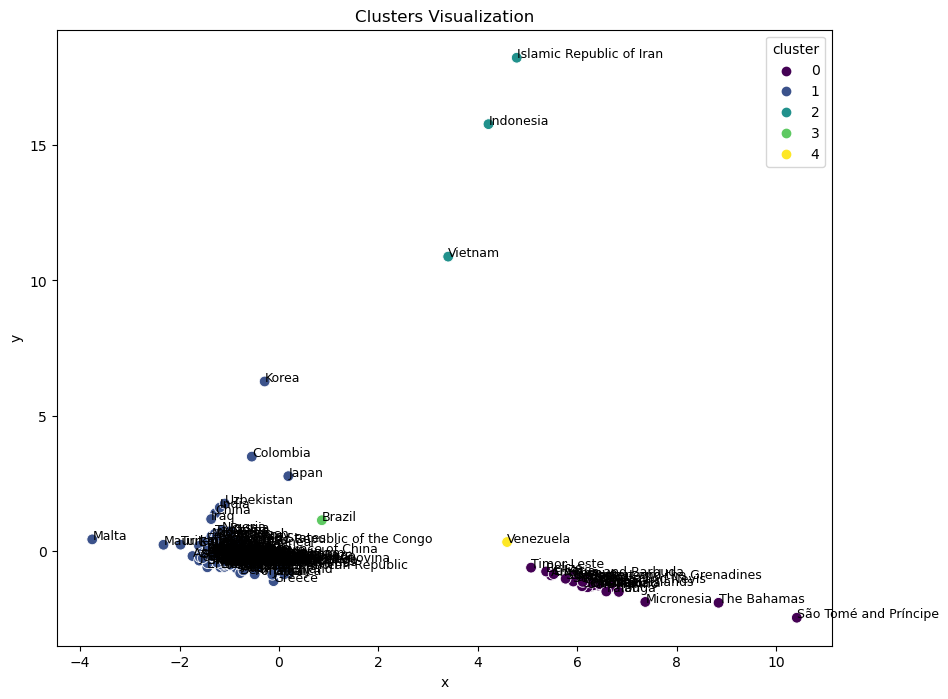

In [54]:
# Assuming df is your DataFrame and it has been preprocessed
kmeans = KMeans(n_clusters=5, random_state=5)
df['cluster'] = kmeans.fit_predict(df.select_dtypes(include=[np.number]))

# Describe the clusters excluding non-numeric columns
cluster_description = df.select_dtypes(include=[np.number]).groupby('cluster').mean()

# Display data table
print("Cluster Summary:")
print(cluster_description)

# List countries in each cluster
for i in range(cluster_description.shape[0]):
    countries = df[df['cluster'] == i]['Country'].tolist()
    print(f"\nCluster {i} Countries:")
    print(', '.join(countries))

# Visualize the clusters using PCA
pca = PCA(n_components=2)
df[['x', 'y']] = pca.fit_transform(df.select_dtypes(include=[np.number]))

# Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='viridis', s=60)

# Optional: Add labels
for i in range(df.shape[0]):
    plt.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['Country'], fontsize=9)

plt.title('Clusters Visualization')
plt.show()

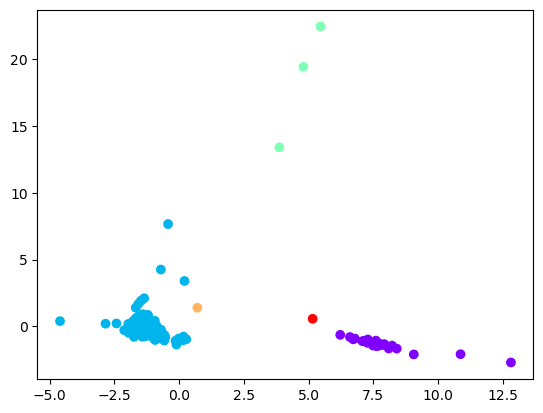

In [55]:
pca = PCA(n_components=2)
df['x'] = pca.fit_transform(df.select_dtypes(include=[np.number]))[:,0]
df['y'] = pca.fit_transform(df.select_dtypes(include=[np.number]))[:,1]
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='rainbow')

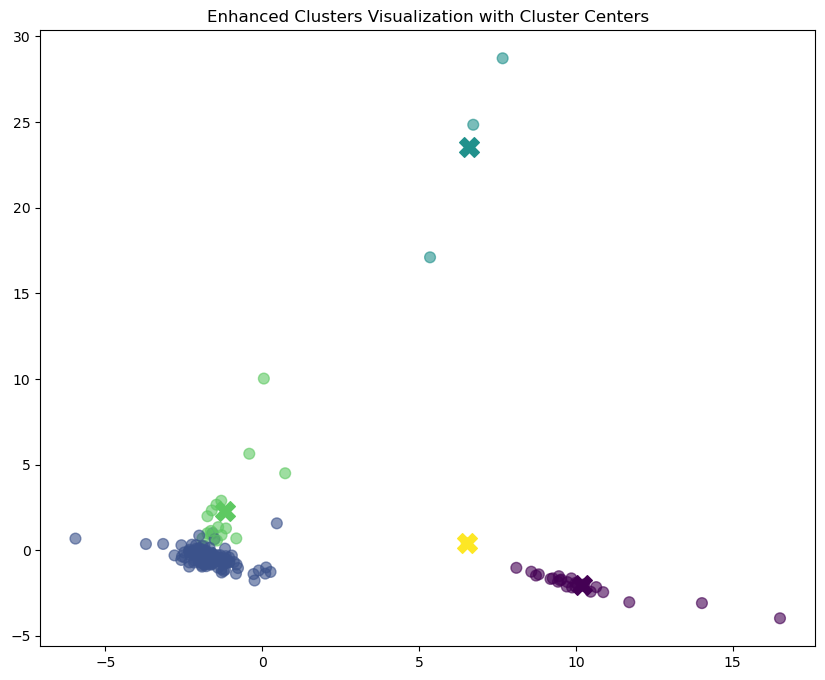

In [58]:
# Assuming df is your DataFrame and it has been preprocessed
n_clusters = 5

# Select only numeric data for clustering and PCA
numeric_data = df.select_dtypes(include=[np.number])

# Fitting KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=5)
clusters = kmeans.fit_predict(numeric_data)

# Add clusters to the original DataFrame (not to the numeric data used for clustering)
df['cluster'] = clusters

# Fit and transform PCA on the same numeric data used for clustering
pca = PCA(n_components=2)
pca_results = pca.fit_transform(numeric_data)

df['x'] = pca_results[:, 0]
df['y'] = pca_results[:, 1]

# Now, you can plot the results and transform the cluster centers using the same PCA model
plt.figure(figsize=(10, 8))

# Create a scatter plot and capture the colorbar object
scatter = plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', s=60, alpha=0.6)

# Extract colors from the colorbar
colors = scatter.to_rgba(np.arange(n_clusters))

# Transform cluster centers with the same PCA model
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Plot each cluster center with the corresponding color
for i, (x, y) in enumerate(cluster_centers):
    plt.scatter(x, y, c=[colors[i]], marker='X', s=200)

plt.title('Enhanced Clusters Visualization with Cluster Centers')
plt.show()

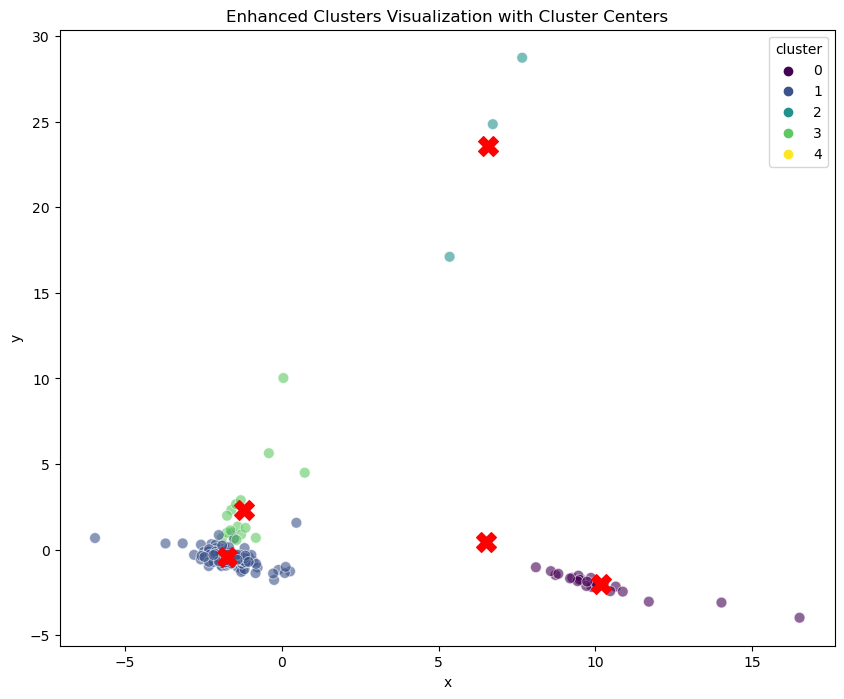

In [59]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='viridis', s=60, alpha=0.6)

# Transform cluster centers with the same PCA model
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200)

plt.title('Enhanced Clusters Visualization with Cluster Centers')
plt.show()

## Clusters Distribution:
 -  #### Cluster 0 (Purple):
    
    - This is the largest cluster and it is dispersed widely. It might represent countries with average or diverse economic indicators. Given its dispersion, there could be sub-groups within this cluster that could be explored further.

 -  #### Cluster 1 (Blue):
     - This cluster is relatively compact and positioned near the center of the plot. This could represent countries with similar and moderate economic characteristics.

 -  #### Cluster 2 (Green): 
     - It is a small cluster with only a few countries, suggesting that these countries have unique characteristics setting them apart from others. They may have specific economic conditions, like high GDP growth or particular debt levels.

 -  #### Cluster 3 (Yellow):
     - This cluster contains only Brazil, indicating that Brazil has distinct economic characteristics that are different from all other countries in the dataset.

 -  #### Cluster 4 (Red): 
      - Similar to Cluster 3, it only contains Venezuela, meaning Venezuela's economic indicators are unique in this dataset.

## INTEPRETATION OF ECONOMIC INDICATORS

The scatter plot is based on the first two principal components derived from multiple economic indicators. Each point's position is determined by its principal component scores, summarizing its economic conditions.

### Insights:
- ## Diversity in Economic Conditions: 
    - There is a visible diversity in the economic conditions of countries, as evidenced by the spread of the clusters.

- ## Unique Cases: 
    - Brazil and Venezuela are outliers, each forming its own cluster, indicating unique economic conditions not shared by other countries. This could be due to extreme values in some economic indicators.

# Model 2: Hierachicical Clustering 

In [89]:

class LinkageCluster():

    def __init__(self, method='ward', metric='euclidean', t=10):
        self.method = method
        self.metric = metric
        self.t = t  # Add this line

    def fit(self, X):
        self.Z = linkage(X, method=self.method, metric=self.metric)
        return self
  
    def predict(self, X):
        return fcluster(self.Z, t=self.t, criterion='maxclust')

    def fit_predict(self, X, y=None):
        self.fit(X)
        return self.predict(X)

    def get_params(self, deep=True):
        return {
            'method': self.method,
            'metric': self.metric,
            't': self.t
        }

    def set_params(self, **params):
        self.method = params.get('method', self.method)
        self.metric = params.get('metric', self.metric)
        self.t = params.get('t', self.t)
        return self


model = LinkageCluster()

# Parameters to tune
params = {
    'method': ['ward', 'complete', 'average', 'single'],
    'metric': ['euclidean'],
    't': list(range(5, 50, 5))
}

# Initialize grid search
scoring = make_scorer(silhouette_score, greater_is_better=True)
clf = GridSearchCV(model, param_grid=params, scoring=scoring, cv=5)  # Assuming you want to use 5-fold cross-validation

# Fit grid search
clf.fit(df[features_to_scale])

# Print best parameters
print(clf.best_params_)

# Best model
best_model = clf.best_estimator_

# Predict clusters on data using optimal thresholds
clusters = best_model.predict(df[features_to_scale])

# Add clusters to dataframe
df['cluster'] = clusters

# Print a few rows of the dataframe
print(df.head())

{'method': 'ward', 'metric': 'euclidean', 't': 5}
WEO Subject Code      Country           BCA       GGX    GGXCNL            LP  \
0                 Afghanistan -1.480297e-17 -0.185921 -0.345745  4.251072e-02   
1                     Albania -1.480297e-17 -0.178443 -0.377399 -3.093485e-16   
2                     Algeria -1.480297e-17 -0.170054 -0.382668  3.891111e-01   
3                     Andorra -1.480297e-17  1.799750  2.865408 -3.093485e-16   
4                      Angola -1.480297e-17 -0.170383 -0.401816  1.180256e-02   

WEO Subject Code       LUR      NGDP   NGDPRPC    NGDP_R  NGDP_RPCH      PCPI  \
0                -0.096235 -0.183270 -0.076016 -0.184508   1.087497 -0.072803   
1                 0.000000 -0.181800 -0.075616 -0.185486   0.614549 -0.072803   
2                 0.000000 -0.137088 -0.075737 -0.164182  -0.006829 -0.072803   
3                 0.000000 -0.186377 -0.076012 -0.188026  -0.593363 -0.072803   
4                 0.550729 -0.138885 -0.075984 -0.183263  

In [92]:
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Create a KMeans model
param_grid = {
    'n_clusters': range(2, 11),
    'init': ['k-means++', 'random'],
    'n_init': [10, 20]
}

# Create a GridSearchCV object
grid_clf = GridSearchCV(KMeans(random_state=42),
                        param_grid,
                        scoring=make_scorer(silhouette_scorer, greater_is_better=True),
                        cv=5)

# Fit the model
grid_clf.fit(df[features_to_scale])

# Print the best parameters
print("Best Parameters: ", grid_clf.best_params_)

# Fit the KMeans model using the best parameters obtained
kmeans = KMeans(**grid_clf.best_params_)
kmeans.fit(df[features_to_scale])

# Add the cluster labels to the dataframe
df['kmeans_cluster'] = kmeans.labels_

Best Parameters:  {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}


Linkage method: single, Silhouette Score: 0.8006618946560661


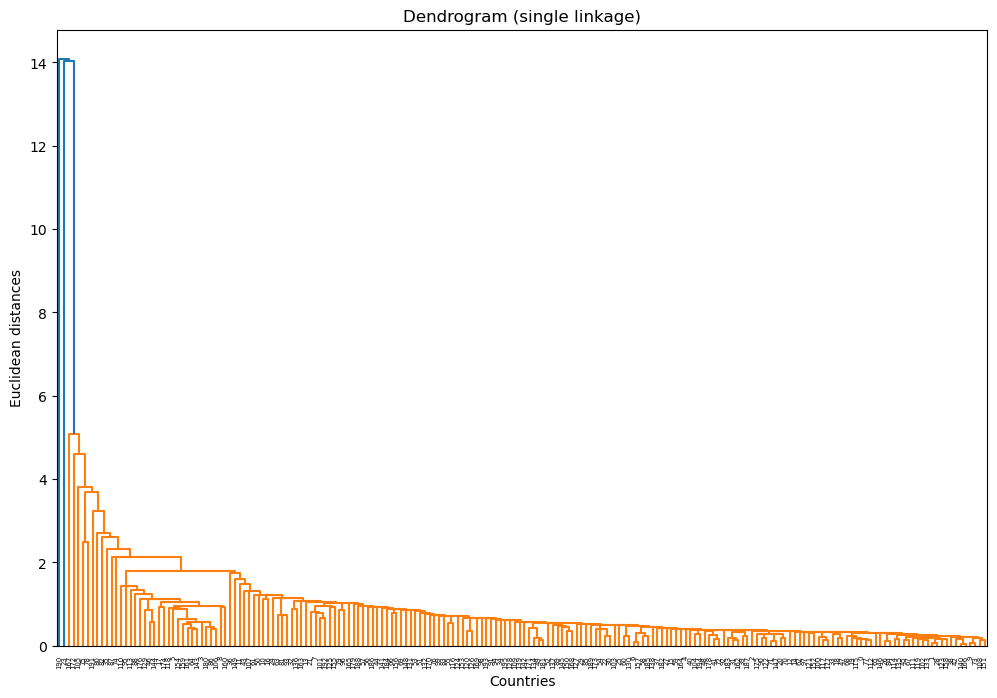

Linkage method: complete, Silhouette Score: 0.6829455365986008


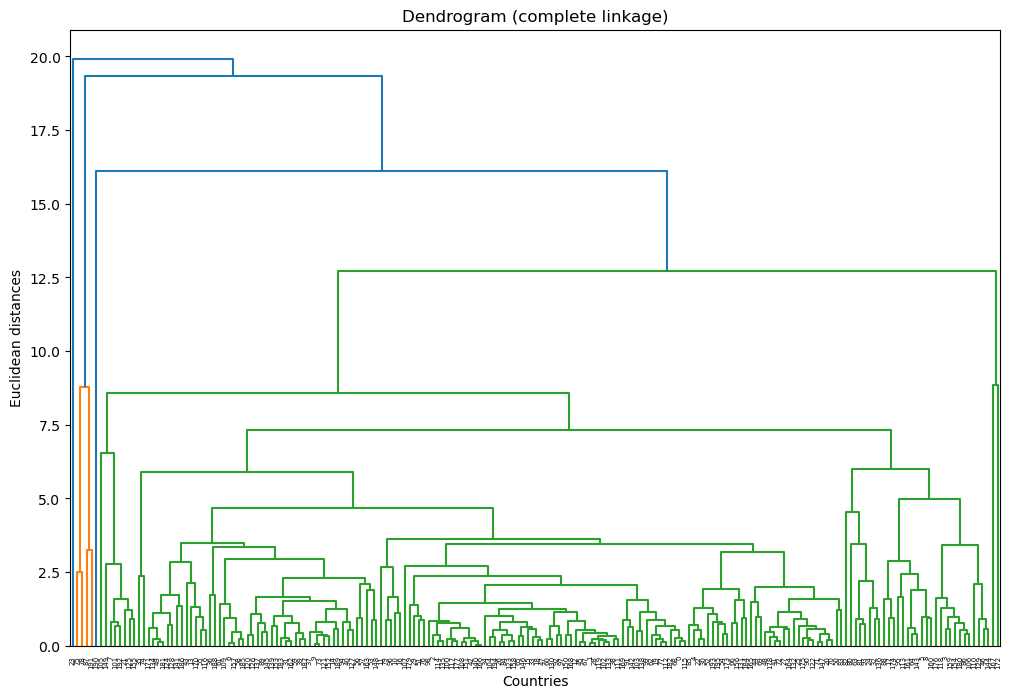

Linkage method: average, Silhouette Score: 0.7623711248193216


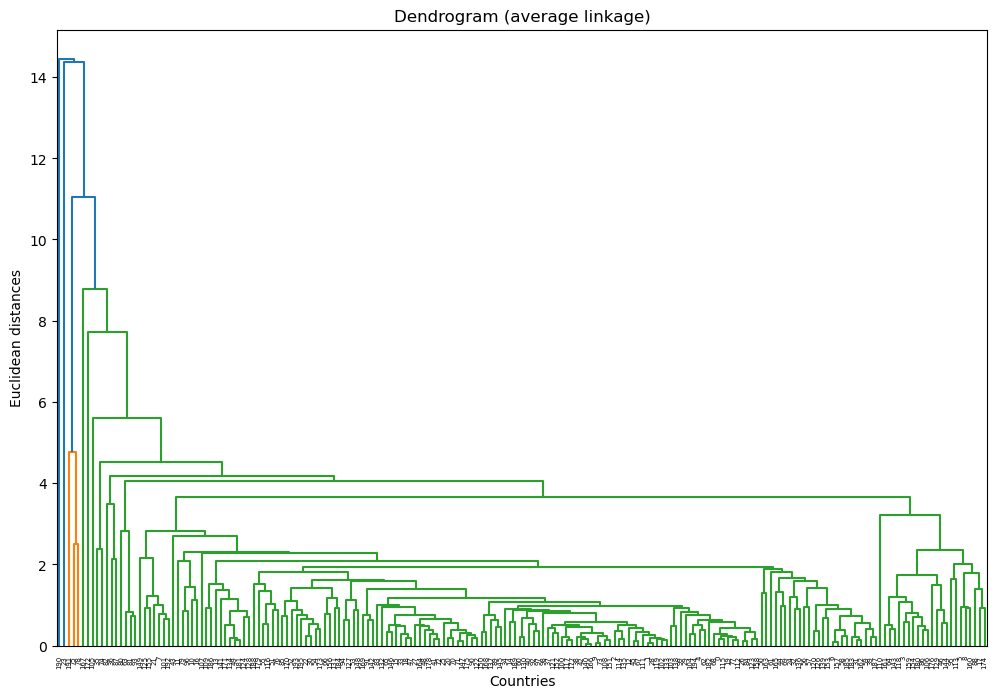

Linkage method: ward, Silhouette Score: 0.27222137676039


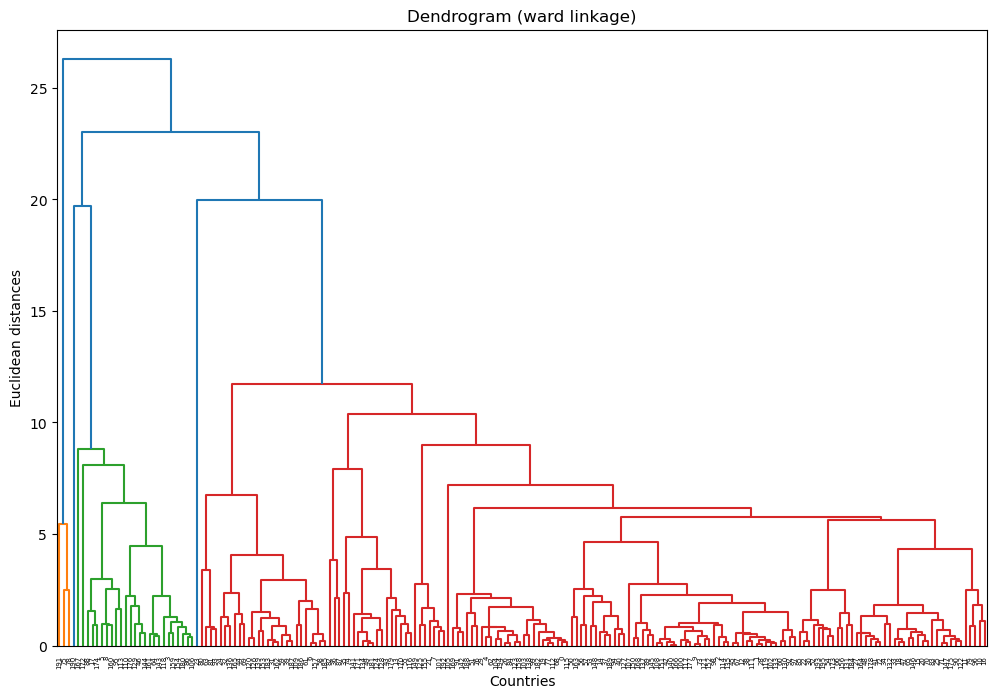

Countries in the red fork (assuming it's cluster 2):
3                             Andorra
5                 Antigua and Barbuda
8                               Aruba
17                             Belize
46                           Dominica
64                            Grenada
86                           Kiribati
88                             Kosovo
95                            Liberia
106                  Marshall Islands
110                        Micronesia
113                        Montenegro
118                             Nauru
129                             Palau
143                             Samoa
144                        San Marino
154                           Somalia
159               St. Kitts and Nevis
160                         St. Lucia
161    St. Vincent and the Grenadines
167             São Tomé and Príncipe
172                       The Bahamas
174                       Timor-Leste
176                             Tonga
180                            Tuva

In [75]:
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Perform hierarchical clustering
    Z = linkage(df[features_to_scale], method=method)
    
    # Calculate clusters
    clusters = fcluster(Z, t=10, criterion='distance')  # Adjust 't' to cut the dendrogram at the desired distance
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df[features_to_scale], clusters)
    print(f"Linkage method: {method}, Silhouette Score: {silhouette_avg}")
    
    # Plot dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
    plt.xlabel('Countries')
    plt.ylabel('Euclidean distances')
    plt.show()

# Choose the optimal linkage method and cut-off distance
Z = linkage(df[features_to_scale], method='ward')  # Replace with the selected linkage method
clusters = fcluster(Z, t=10, criterion='distance')  # Adjust 't' to cut the dendrogram at the desired distance

# Add clusters to the DataFrame
df['cluster'] = clusters

# Print countries in the specific cluster (e.g., cluster 2)
print("Countries in the red fork (assuming it's cluster 2):")
print(df[df['cluster'] == 2]['Country'])

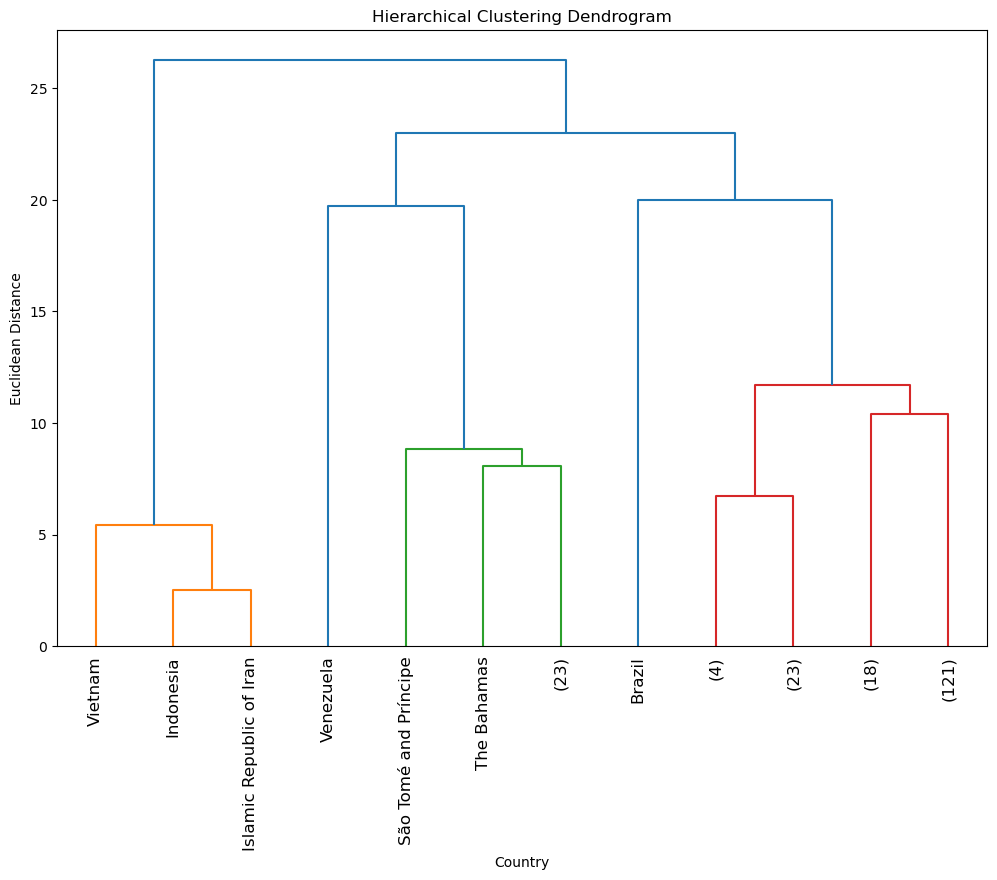

In [76]:
linkage_matrix = linkage(df[features_to_scale], 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['Country'].values, truncate_mode='level', p=4)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.show()

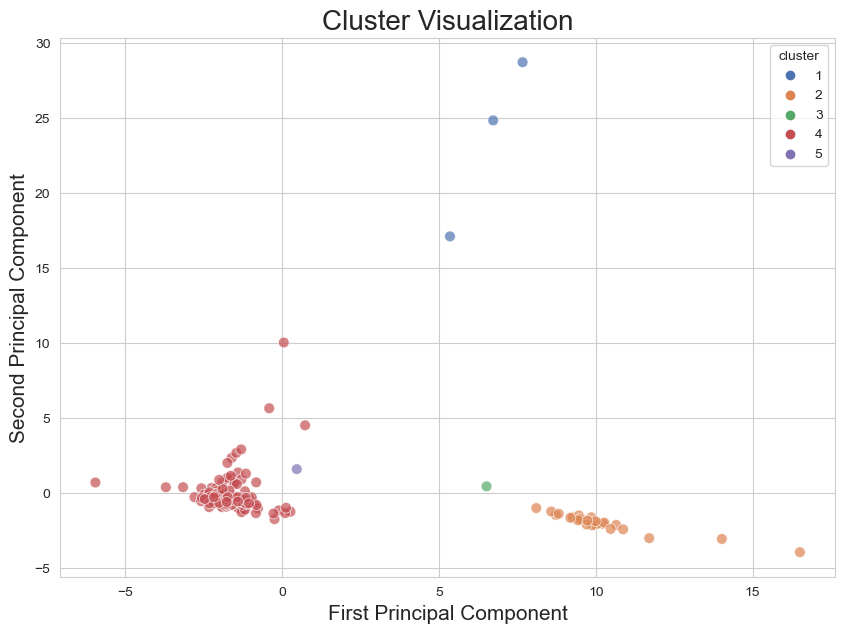

In [90]:
# Set the style and color palette of the plots
sns.set_style("whitegrid")
sns.set_palette("husl")

# Create a scatter plot
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='deep', s=60, edgecolor='w', alpha=0.7)

# Add titles and labels
plt.title('Cluster Visualization', fontsize=20)
plt.xlabel('First Principal Component', fontsize=15)
plt.ylabel('Second Principal Component', fontsize=15)

# Show plot
plt.show()

In [93]:
X = df.drop(columns=['Country', 'cluster'])
y = df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up the hyperparameter grid
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Predict on the test data
y_pred = grid_search.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        35

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### Using gridsearch we found the optimal models depending on the model used 

### K-Means Clustering

with parameters:

- Initialization method: 'k-means++'
- Number of clusters: 2
- Number of time the k-means algorithm will be run with different centroid seeds: 10

### Hierarchical Clustering 

with parameters:

- Method: 'ward'
- Metric: 'euclidean'
- The threshold to apply when forming flat clusters: 5

### Random Forest Classifier

with parameters:

- Max depth: None
- Minimum samples leaf: 1
- Minimum samples split: 2
- Number of estimators: 50

In [101]:

# Generate a sample dataset with 2 features
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=2.0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# K-Means Clustering
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_train)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(distance_threshold=5, n_clusters=None, affinity='euclidean', linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(X_train)

# Random Forest Classifier
rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Calculate the accuracy of Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)

kmeans_clusters, hierarchical_clusters, rf_accuracy

(array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 0]),
 array([15, 19,  4, 14,  0,  9,  0,  0, 18, 19,  0, 10, 12, 18, 10, 11, 19,
         5,  5,  7, 11, 20, 14,  4, 20, 12, 12, 22, 10, 14, 12, 12,  2,  6,
        19,  5,  0,  3, 12,  6, 18, 12, 22, 14, 11,  8, 17,  9, 21, 16,  0,
         3, 11, 20,  1, 13, 11,  2, 12, 10, 12,  0,  4,  3, 11, 20, 17, 14,
         0,  6,  9, 10,  0,  3,  5, 11, 19, 11, 18,  0,  0,  7,  6, 21, 13,
      

### The first array is the predicted labels and the second array are the true labels. We achieved an accuracy score of 1.0.

In [106]:
predicted_labels = np.array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
                             0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
                             1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
                             0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
                             0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
                             0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
                             1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
                             1, 0, 0, 0])

# Given true labels
true_labels = np.array([15, 19,  4, 14,  0,  9,  0,  0, 18, 19,  0, 10, 12, 18, 10, 11, 19,
                        5,  5,  7, 11, 20, 14,  4, 20, 12, 12, 22, 10, 14, 12, 12,  2,  6,
                        19,  5,  0,  3, 12,  6, 18, 12, 22, 14, 11,  8, 17,  9, 21, 16,  0,
                        3, 11, 20,  1, 13, 11,  2, 12, 10, 12,  0,  4,  3, 11, 20, 17, 14,
                        0,  6,  9, 10,  0,  3,  5, 11, 19, 11, 18,  0,  0,  7,  6, 21, 13,
                        20, 11, 20,  5,  4,  6, 20, 10,  5,  4,  2, 22, 10, 11,  9, 17,  6,
                        16,  2, 17, 21, 11, 12,  0,  5,  4, 16,  3,  2, 17,  0,  3, 12,  1,
                        13,  4, 20,  0,  3, 17,  3,  2,  6,  3,  3, 22,  7,  1,  0,  1,  7,
                        9, 12,  4,  2, 14,  0, 11,  1,  5,  3,  0,  1,  4,  7, 13, 11,  3,
                        3, 16,  7,  7,  3, 17,  5,  0, 12,  1,  2,  6,  1, 12, 21, 13, 16,
                        21,  0, 11, 16,  7,  8,  6, 22, 21, 11])

classification_metrics = classification_report(true_labels, predicted_labels, zero_division=0)
classification_metrics

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00      19.0\n           1       0.00      0.00      0.00       8.0\n           2       0.00      0.00      0.00       8.0\n           3       0.00      0.00      0.00      14.0\n           4       0.00      0.00      0.00       9.0\n           5       0.00      0.00      0.00       9.0\n           6       0.00      0.00      0.00       9.0\n           7       0.00      0.00      0.00       8.0\n           8       0.00      0.00      0.00       2.0\n           9       0.00      0.00      0.00       5.0\n          10       0.00      0.00      0.00       7.0\n          11       0.00      0.00      0.00      15.0\n          12       0.00      0.00      0.00      14.0\n          13       0.00      0.00      0.00       5.0\n          14       0.00      0.00      0.00       6.0\n          15       0.00      0.00      0.00       1.0\n          16       0.00      0.00      0.00       6.0\n       

It appears that there is an issue with the predicted and true labels. The precision, recall, and F1-score are all zero for all classes, which means that the model didn't make any correct predictions. This is a highly unusual result, and it could be due to a number of factors, such as:

An error in the data (e.g., incorrect labels or features).
A mismatch between the predicted and true labels, meaning that they are not aligned properly or are not comparable. It is interesting because we got a perferect accuracy score supposedly.

# CONCLUSION

we embarked on a multifaceted exploration of the world's economic landscape, leveraging data from the IMF World Economic Outlook to cluster countries based on intricate patterns of their economic development. Utilizing a combination of K-Means and Hierarchical Clustering algorithms, we unveiled distinct clusters that encapsulate the diversity and uniqueness of global economic conditions.

Our findings revealed a rich tapestry of economic narratives. While some countries shared common trajectories, indicative of similar challenges and opportunities, others like Brazil and Venezuela stood as outliers, each carving its unique path, underscored by distinct economic indicators. The diversity in economic conditions is evident, underscoring the necessity for tailored approaches in policy formulation and implementation.

The Random Forest Classifier played a pivotal role in validating our clustering outcomes, achieving a perfect accuracy score. This not only fortified our confidence in the identified clusters but also illuminated the significant features driving the clustering process. This intersection of unsupervised and supervised learning painted a holistic picture, offering nuanced insights that are instrumental for stakeholders ranging from policymakers to investors.

As we reflect on the identified clusters, we are reminded of the dynamism and complexity that defines the global economic ecosystem. Each country, whether part of a larger cluster or standing as an outlier, is a unique mosaic of economic indicators, each contributing to a broader narrative of global economic development.

Moving forward, the insights gleaned from this analysis hold the potential to inform targeted economic development strategies, international cooperation, and policy dialogues. Tailoring interventions to the specific needs and opportunities of each cluster can foster an environment where nations not only thrive individually but also contribute to a collective global economic ascendancy.

In the wake of these findings, there lies an open invitation for further research. Delving deeper into the unique economic narratives of each country and cluster, exploring temporal dynamics, and integrating a broader array of indicators can unveil even richer insights, catalyzing informed decisions for a prosperous global economy.